<a href="https://colab.research.google.com/github/JehadOumer/IMDB-Reviews-Classification/blob/main/Dataset_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import pandas as pd
import numpy as np
import seaborn as sns
import re
from wordcloud import WordCloud


In [21]:
(training_data, validation_data, testing_data), ds_info  = tfds.load(
    name="imdb_reviews", split=('train+test[0:5000]', 'test[5000:15000]', 'test[15000:]'), as_supervised=True, with_info=True)
##The label is an integer value of either 0 or 1, where 0 is a negative review, and 1 is a positive review.



In [22]:
training_data = tfds.as_dataframe(training_data, ds_info)
validation_data= tfds.as_dataframe(validation_data, ds_info)
testing_data=tfds.as_dataframe(testing_data, ds_info)
all_data = pd.concat([training_data, testing_data, validation_data])


In [28]:
print("Dataset length: ", len(all_data["label"]), "points")
print("Training set length: ", len(training_data["label"]), "points")
print("Validation set length: ", len(validation_data["label"]), "points")
print("Testing set length: ", len(testing_data["label"]), "points")



Dataset length:  50000 points
Training set length:  30000 points
Validation set length:  10000 points
Testing set length:  10000 points


In [32]:
training_data.tail(5)

,label,text
29995,0,"b'I have a severe problem with this show, seve..."
29996,1,"b'The year is 1964. Ernesto ""Che"" Guevara, hav..."
29997,0,b'Okay. So I just got back. Before I start my ...
29998,0,b'When I saw this trailer on TV I was surprise...
29999,1,"b'First of all, Riget is wonderful. Good comed..."


In [36]:
validation_data.head(5)

,label,text
0,0,"b""I had always eyed Italian horror maestro Dar..."
1,0,"b""This is supposed to be based on Wilkie Colli..."
2,1,b'So I guess that Bud and Lou just liked to me...
3,1,b'I opted to watch this film for one reason an...
4,1,"b'Overall, a well done movie. There were the p..."


In [39]:
validation_data.tail(5)

,label,text
9995,1,"b""Christopher Nolan's first film is a 'no budg..."
9996,0,b'The commercials for RAT RACE made it look to...
9997,1,"b""If you take the movie for what it is worth, ..."
9998,1,"b""King of the Underworld features an early rol..."
9999,1,"b""Human Traffic is a view into an average week..."


In [38]:
testing_data.head(5)

,label,text
0,1,"b""I saw this play on Showtime some years back ..."
1,0,"b""Remnants of an ambushed Army unit hook up wi..."
2,0,b'I recently picked up all three Robocop films...
3,1,b'A great movie about triumph over all the nay...
4,1,b'The Lone Ranger was one of my childhood hero...


In [40]:
negative_reviews=all_data[all_data['label']==0]
positive_reviews=all_data[all_data['label']==1]
all_reviews=all_data['text']

In [41]:
all_reviews.head(8)

0    b"This was an absolutely terrible movie. Don't...
1    b'I have been known to fall asleep during film...
2    b'Mann photographs the Alberta Rocky Mountains...
3    b'This is the kind of film for a snowy Sunday ...
4    b'As others have mentioned, all the women that...
5    b"This is a film which should be seen by anybo...
6    b'Okay, you have:<br /><br />Penelope Keith as...
7    b'The film is based on a genuine 1950s novel.<...
Name: text, dtype: object

The number of positive reviews:  25000
The number of negative reviews:  25000


Text(0.5, 1.0, 'Class Distribution')

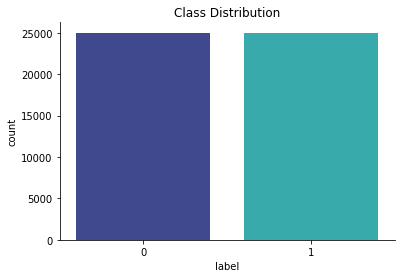

In [42]:
## Data distribution in terms of labels
print("The number of positive reviews: ", len(positive_reviews))
print("The number of negative reviews: ", len(negative_reviews))
sns.countplot(x='label', data = all_data, palette = 'mako',
              saturation = 1)
sns.despine()
plt.title('Class Distribution')

In [43]:
def extract_tokens(reviews):
  tokens = ''
  for review in reviews:
    temp = str(review).lower().strip()
    temp = temp.replace('\n', ' ')
    temp = temp.replace('<br />', ' ')
    temp = temp.replace('\\', '')
    temp = re.sub(r'^(b\'|b\")', '',temp)
    temp = re.sub(r'(\'|\")$', '',temp)
    temp = ' '.join(temp.split())
    tokens += temp + ' '
  return tokens

In [44]:
all_tokens = extract_tokens(all_reviews)
positive_tokens = extract_tokens(positive_reviews)
negative_tokens = extract_tokens(negative_reviews)

In [45]:
for review in all_reviews.head(20):
  review_str=str(review)

  print(review_str,"\n")

b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it." 

b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development w

In [46]:
for review in all_reviews.head(20):
  review_str=str(review)
  review_str = review_str.replace('\n', ' ')
  review_str = review_str.replace('<br />', ' ')
  review_str = review_str.replace('\\', '')
  review_str=re.sub(r'^(b\'|b\")', '',review_str)
  review_str=re.sub(r'(\'|\")$', '',review_str)
  print(review_str,"\n")

This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it. 

I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was co